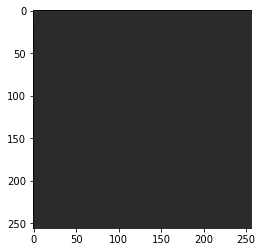

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

if __name__ == "__main__":
    img = cv2.imread('./face.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_float = np.float32(img)
    dct = cv2.dct(img_float)
    plt.imshow(dct, 'gray')
    plt.show()